Code that listens to the microphone, takes in a 5 second chunk, processes it for the model, pushes it through the model, and gets the prediction out.

In [2]:
import keras
from pydub import AudioSegment
from mb_utils import *

from datetime import datetime

import pyaudio
import wave

Using TensorFlow backend.
/anaconda/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
%matplotlib inline

In [4]:
from importlib import reload
import mb_utils

In [23]:
reload(mb_utils)
from mb_utils import *

### initialization: load trained model

In [6]:
model = keras.models.load_model('trained_models/6880363.h5')

### set up to listen to audio

In [7]:
p = pyaudio.PyAudio()
for ii in range(p.get_device_count()):
    print(p.get_device_info_by_index(ii).get('name'))

Built-in Microphone
Built-in Output


In [8]:
# choose the 'Built-in Microphone'
dev_index = 0

In [9]:
# audio settings
form_1 = pyaudio.paInt16 # 16-bit resolution
chans = 1 # 1 channel
samp_rate = 44100 # 44.1kHz sampling rate
chunk = 4096 # 2^12 samples for buffer
record_secs = 5 # seconds to record
dev_index = dev_index # device index found by p.get_device_info_by_index(ii)
#wav_output_filename = 'test1.wav' # name of .wav file

### listen and predict 

Recording...
Clip start: 03/18/2020 08:13:22...   prediction: not_enough.   [0.1105, 0.0005, 0.8890]
Clip start: 03/18/2020 08:13:28...   prediction: not_enough.   [0.0000, 0.0003, 0.9997]
Clip start: 03/18/2020 08:13:33...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 03/18/2020 08:13:38...   prediction: enough.   [0.0088, 0.9912, 0.0000]
Clip start: 03/18/2020 08:13:43...   prediction: not_enough.   [0.0000, 0.0004, 0.9996]
stream closed.


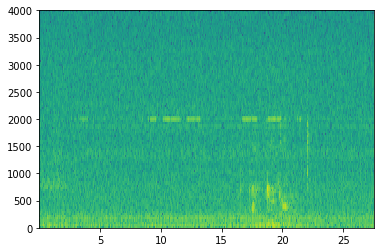

In [24]:
# create pyaudio instantiation
audio = pyaudio.PyAudio() 

# create pyaudio stream
stream = audio.open(format = form_1,rate = samp_rate,channels = chans, \
                    input_device_index = dev_index,input = True, \
                    frames_per_buffer=chunk)


# process five seconds at a time and return predictions
print('Recording...')
for i in range(5):
    pred, preds, now = record_and_process_5_seconds(i, samp_rate, chunk, record_secs, stream,chans, 
                                        form_1, audio, model)


# stop the stream, close it, and terminate the pyaudio instantiation
stream.stop_stream()
stream.close()
print('stream closed.')
audio.terminate()

In [16]:
import IPython

In [17]:
IPython.display.Audio('runtime_temp.wav')

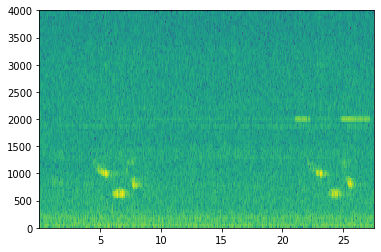

In [18]:
x = graph_spectrogram('runtime_temp.wav')

### practice runtime for 30 minutes

In [31]:
import pandas as pd

In [73]:
n_minutes = 30

In [74]:
filename_to_save = 'runtime_testing_200318.csv'

In [75]:
# initialize DF to record predictions
pdf = pd.DataFrame([], columns = ['datetime', 'empty', 'enough', 'notenough', 'predictions'])

Recording...
Clip start: 03/18/2020 08:38:33...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:38:39...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:38:44...   prediction: empty.   [0.9712, 0.0288, 0.0000]
Clip start: 03/18/2020 08:38:49...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:38:54...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:38:59...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:39:04...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:39:09...   prediction: empty.   [0.9962, 0.0000, 0.0038]
Clip start: 03/18/2020 08:39:14...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:39:19...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:39:24...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:39:29...   prediction: not_enough.   [0.0000, 0.

Clip start: 03/18/2020 08:46:46...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:46:51...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:46:56...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:01...   prediction: not_enough.   [0.0000, 0.0000, 1.0000]
Clip start: 03/18/2020 08:47:06...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:11...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:16...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:21...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:26...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:31...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:36...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:47:41...   prediction: empty.   [1.0000, 0.0000, 0.0000]

Clip start: 03/18/2020 08:54:57...   prediction: not_enough.   [0.4614, 0.0000, 0.5386]
Clip start: 03/18/2020 08:55:02...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:07...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:12...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:17...   prediction: not_enough.   [0.0341, 0.0001, 0.9658]
Clip start: 03/18/2020 08:55:22...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:27...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:32...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:37...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:42...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:47...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 08:55:52...   prediction: empty.   [1.0000, 0.0000, 0.

Clip start: 03/18/2020 09:03:09...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:14...   prediction: enough.   [0.0000, 1.0000, 0.0000]
Clip start: 03/18/2020 09:03:19...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:24...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:29...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:34...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:39...   prediction: not_enough.   [0.0000, 0.0004, 0.9996]
Clip start: 03/18/2020 09:03:44...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:49...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:54...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:03:59...   prediction: empty.   [1.0000, 0.0000, 0.0000]
Clip start: 03/18/2020 09:04:04...   prediction: empty.   [1.0000, 0.0000, 0.0000

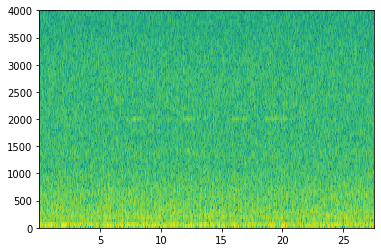

In [76]:
# create pyaudio instantiation
audio = pyaudio.PyAudio() 

# create pyaudio stream
stream = audio.open(format = form_1,rate = samp_rate,channels = chans, \
                    input_device_index = dev_index,input = True, \
                    frames_per_buffer=chunk)


# process five seconds at a time and return predictions
print('Recording...')
for i in range(12*n_minutes):
    pred, preds, now = record_and_process_5_seconds(i, samp_rate, chunk, record_secs, stream,chans, 
                                        form_1, audio, model)
    tdf = pd.DataFrame([[now, preds[0][0], preds[0][1], preds[0][2], pred]], 
                       columns = ['datetime', 'empty', 'enough', 'notenough', 'predictions'])

    pdf = pdf.append(tdf, ignore_index=True)
    if (i+1)%12==0:
        pdf.to_csv(filename_to_save, index=False)

# stop the stream, close it, and terminate the pyaudio instantiation
stream.stop_stream()
stream.close()
print('stream closed.')
audio.terminate()

# save predictions to CSV
pdf.to_csv(filename_to_save, index=False)

In [77]:
pdf.shape

(360, 5)

In [78]:
pdf2 = pd.read_csv(filename_to_save)

In [79]:
pdf2.shape

(360, 5)

In [94]:
pdf.head()

,datetime,empty,enough,notenough,predictions,predictions_ordinal,timestep,minutes
0,2020-03-18 08:38:33,1.000000,0.000000e+00,6.648634e-18,empty,0,0,0.000000
1,2020-03-18 08:38:39,1.000000,7.513139e-18,0.000000e+00,empty,0,1,0.083333
2,2020-03-18 08:38:44,0.971155,2.884465e-02,3.461923e-08,empty,0,2,0.166667
3,2020-03-18 08:38:49,1.000000,1.789741e-35,6.128830e-37,empty,0,3,0.250000
4,2020-03-18 08:38:54,1.000000,0.000000e+00,0.000000e+00,empty,0,4,0.333333


In [82]:
pdf.predictions.value_counts()/len(pdf)

empty         0.877778
not_enough    0.088889
enough        0.033333
Name: predictions, dtype: float64

In [83]:
import seaborn as sns

In [84]:
pdf['datetime'] = pd.to_datetime(pdf['datetime'])

In [96]:
def ordinalize(s):
    if s == 'empty':    
        return 0
    elif s == 'enough':  # krishnamurti
        return 1
    elif s == 'not_enough': # continue
        return 2
    else:
        return 3
pdf['predictions_ordinal'] = pdf['predictions'].apply(ordinalize)

In [93]:
pdf['minutes'] = pdf.index/12

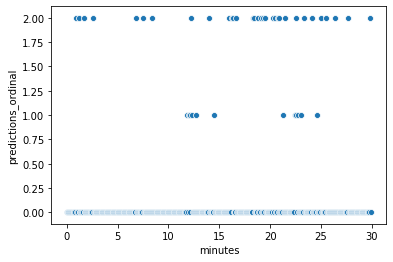

In [97]:
sns.scatterplot(x = 'minutes', y = 'predictions_ordinal', data=pdf)

#### Notes:

- `runtime_testing_200318`: with `6880363.h5`.  does well with 'enough', but is hearing too many 'not_enough'.  Maybe I need to say it a few times for something to trigger?

In [98]:
pdf.predictions

0           empty
1           empty
2           empty
3           empty
4           empty
5           empty
6           empty
7           empty
8           empty
9           empty
10          empty
11     not_enough
12          empty
13          empty
14     not_enough
15          empty
16          empty
17          empty
18          empty
19          empty
20     not_enough
21          empty
22          empty
23          empty
24          empty
25          empty
26          empty
27          empty
28          empty
29          empty
          ...    
330         empty
331         empty
332    not_enough
333         empty
334         empty
335         empty
336         empty
337         empty
338         empty
339         empty
340         empty
341         empty
342         empty
343         empty
344         empty
345         empty
346         empty
347         empty
348         empty
349         empty
350         empty
351         empty
352         empty
353         empty
354       

### practice runtime: listen to microphone and get a 5-second audio chunk, then predict on it

'not_enough'

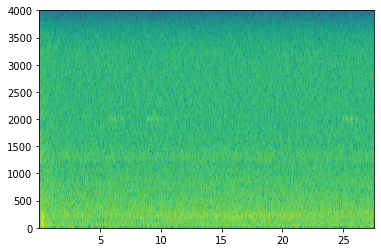

In [7]:
# for now, read in a sample WAV file
filename = 'runtime_temp.wav'

# clean up to make sure it is in correct format. saves it to runtime_temp.wav.
preprocess_runtime_clip(filename)

# feed current clip to model and get prediction
pred = run_model_on_clip(model, 'runtime_temp.wav')
pred